# Exploratory Data Analysis and Data Cleaning

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the loan dataset
df = pd.read_csv("heart_2020_cleaned.csv")

# Configuring the display of pandas table
pd.set_option("display.max_colwidth", None)

In [3]:
# Display the top 5 records
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
print("There are a toal of",df.shape[0],"records and",df.shape[1],"columns.")

There are a toal of 319795 records and 18 columns.


In [5]:
print("Columns in the dataset:\n",list(df.columns))

Columns in the dataset:
 ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


<h3>Description of the dataset</h3>
    
- <b>HeartDisease</b>: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

- <b>BMI</b>: Body Mass Index (BMI)

- <b>Smoking</b>: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

- <b>AlcoholDrinking</b>: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

- <b>Stroke</b>: (Ever told) (you had) a stroke?

- <b>PhysicalHealth</b>: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

- <b>MentalHealth</b>: How many days during the past 30 days was your mental health not good? (0-30 days)

- <b>DiffWalking</b>: Do you have serious difficulty walking or climbing stairs?

- <b>Sex</b>: Are you male or female?

- <b>AgeCategory</b>: Fourteen-level age category

- <b>Race</b>: Imputed race/ethnicity value

- <b>Diabetic</b>: (Ever told) (you had) diabetes?

- <b>PhysicalActivity</b>: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

- <b>GenHealth</b>: Would you say that in general your health is...

- <b>SleepTime</b>: On average, how many hours of sleep do you get in a 24-hour period?

- <b>Asthma</b>: (Ever told) (you had) asthma?

- <b>KidneyDisease</b>: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

- <b>SkinCancer</b>: (Ever told) (you had) skin cancer?

In [6]:
print("Number of null values in each column:")
df.isna().sum()

Number of null values in each column:


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No null values in any of the columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
continuous_features = df.select_dtypes(include='float64').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

In [9]:
print("Continuous Features:", continuous_features)
print("\nCategorical Features:", categorical_features)

Continuous Features: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

Categorical Features: ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


## Duplicates

In [10]:
no_duplicates = df.drop_duplicates()
print("Number of duplicates dropped:",df.shape[0] - no_duplicates.shape[0])

Number of duplicates dropped: 18078


## Outliers in Numerical columns

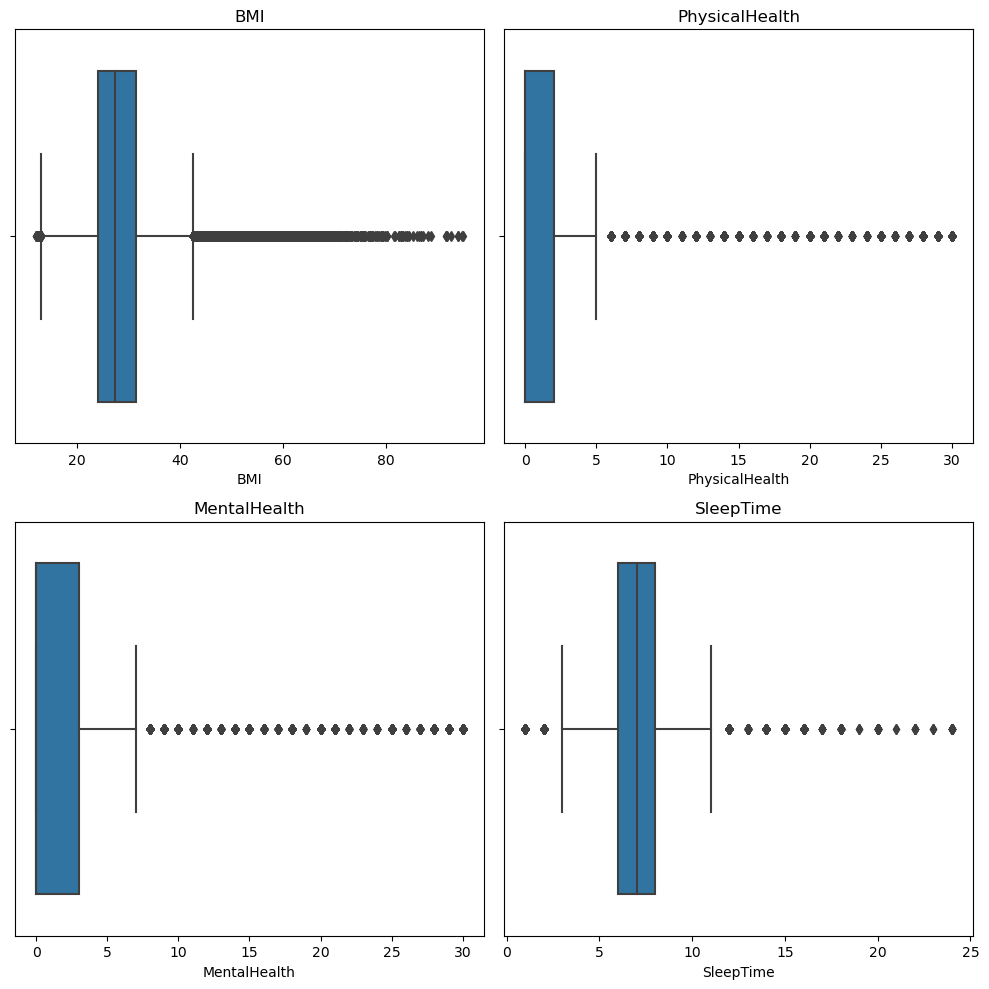

In [11]:
num_subplots = len(continuous_features)

# Create a grid of subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axes array to make it easier to iterate through the subplots
axes = axes.flatten()

# Plot each column as a separate boxplot in the corresponding subplot
for i, column in enumerate(continuous_features):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Remove any remaining empty subplots if the number of columns is less than 6
for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # To improve the spacing between subplots
plt.show()

Apart from Meantal and PhysicalHealth column, I will remove outliers in BMI and SleepTime as they are not logical and are likely outliers which could affect model prediction performance.

In [12]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr 
    df = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df

<AxesSubplot:xlabel='BMI'>

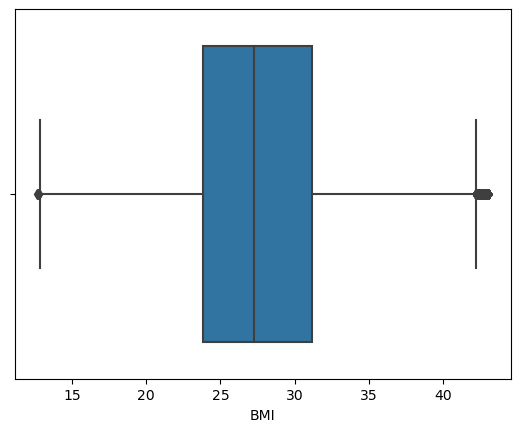

In [13]:
no_duplicates = remove_outlier(no_duplicates, "BMI")
sns.boxplot(x=no_duplicates['BMI'])

<AxesSubplot:xlabel='SleepTime'>

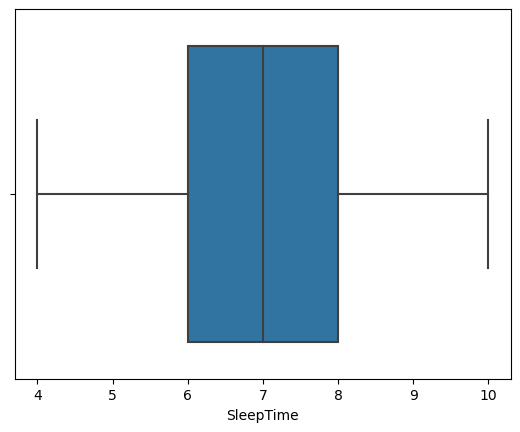

In [14]:
no_duplicates = remove_outlier(no_duplicates, "SleepTime")
sns.boxplot(x=no_duplicates['SleepTime'])

## Replacing Values

In [15]:
categorical_columns = no_duplicates.select_dtypes(include='object').columns.tolist()

In [16]:
for column in categorical_columns:
    print(column, no_duplicates[column].unique(),'\n')

HeartDisease ['No' 'Yes'] 

Smoking ['Yes' 'No'] 

AlcoholDrinking ['No' 'Yes'] 

Stroke ['No' 'Yes'] 

DiffWalking ['No' 'Yes'] 

Sex ['Female' 'Male'] 

AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity ['Yes' 'No'] 

GenHealth ['Very good' 'Fair' 'Good' 'Excellent' 'Poor'] 

Asthma ['Yes' 'No'] 

KidneyDisease ['No' 'Yes'] 

SkinCancer ['Yes' 'No'] 



In [17]:
print("Percent of each value:\n",(no_duplicates.Diabetic.value_counts()/no_duplicates.shape[0])*100)

Percent of each value:
 No                         84.251405
Yes                        12.707885
No, borderline diabetes     2.200785
Yes (during pregnancy)      0.839925
Name: Diabetic, dtype: float64


### Replacing Diabetic Column

Yes during pregnancy means having diabetes so I convert it to 'yes'.
No, borderline diabetes means the individual does not have diabetes so 'no'.

In [18]:
# Replace diabetic values to be Yes/No only.
no_duplicates['Diabetic'] = no_duplicates['Diabetic'].replace({'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'})

In [19]:
print("Percent of each value:\n",(no_duplicates.Diabetic.value_counts()/no_duplicates.shape[0])*100)

Percent of each value:
 No     86.45219
Yes    13.54781
Name: Diabetic, dtype: float64


### Replacing Yes/No to 0s and 1s.

Yes --> 1

No --> 0

In [20]:
columns_to_replace = [column for column in categorical_columns if 'Yes' in list(no_duplicates[column].unique())]

In [21]:
for column in columns_to_replace:
    no_duplicates[column] = no_duplicates[column].replace({'Yes':1, 'No':0})

In [22]:
for column in categorical_columns:
    print(column, no_duplicates[column].unique(),'\n')

HeartDisease [0 1] 

Smoking [1 0] 

AlcoholDrinking [0 1] 

Stroke [0 1] 

DiffWalking [0 1] 

Sex ['Female' 'Male'] 

AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic [1 0] 

PhysicalActivity [1 0] 

GenHealth ['Very good' 'Fair' 'Good' 'Excellent' 'Poor'] 

Asthma [1 0] 

KidneyDisease [0 1] 

SkinCancer [1 0] 



In [23]:
no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286216 entries, 0 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      286216 non-null  int64  
 1   BMI               286216 non-null  float64
 2   Smoking           286216 non-null  int64  
 3   AlcoholDrinking   286216 non-null  int64  
 4   Stroke            286216 non-null  int64  
 5   PhysicalHealth    286216 non-null  float64
 6   MentalHealth      286216 non-null  float64
 7   DiffWalking       286216 non-null  int64  
 8   Sex               286216 non-null  object 
 9   AgeCategory       286216 non-null  object 
 10  Race              286216 non-null  object 
 11  Diabetic          286216 non-null  int64  
 12  PhysicalActivity  286216 non-null  int64  
 13  GenHealth         286216 non-null  object 
 14  SleepTime         286216 non-null  float64
 15  Asthma            286216 non-null  int64  
 16  KidneyDisease     28

In [24]:
columns_to_display = [column for column in categorical_columns if 0 in list(no_duplicates[column].unique())]

In [25]:
columns_to_display

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Diabetic',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

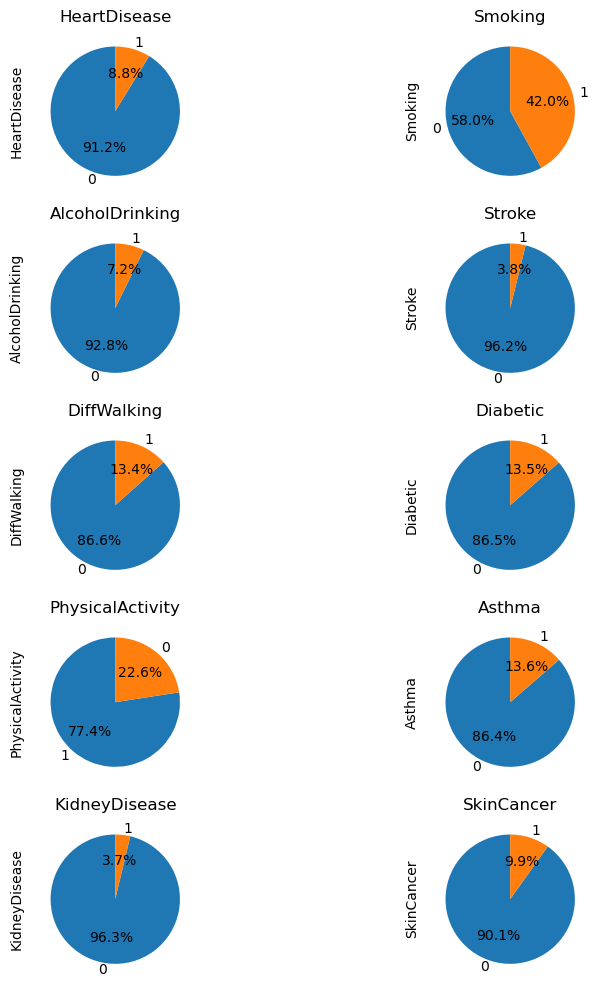

In [26]:
num_subplots = len(columns_to_display)

# Create a grid of subplots with appropriate number of rows and columns
num_rows = (num_subplots + 1) // 2  # Adjust the number of rows based on the number of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 10))

# Flatten the axes array to make it easier to iterate through the subplots
axes = axes.flatten()

# Plot pie charts for each column in the corresponding subplot
for i, column in enumerate(columns_to_display):
    no_duplicates[column].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(column)

# Remove any remaining empty subplots
for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # To improve the spacing between subplots
plt.show()

In [27]:
columns_to_display = [column for column in categorical_columns if 0 not in list(no_duplicates[column].unique())]

C:\Users\fangg\AppData\Local\Temp\ipykernel_13160\2727334809.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(category_counts.index, rotation=90)
C:\Users\fangg\AppData\Local\Temp\ipykernel_13160\2727334809.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(category_counts.index, rotation=90)
C:\Users\fangg\AppData\Local\Temp\ipykernel_13160\2727334809.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(category_counts.index, rotation=90)
C:\Users\fangg\AppData\Local\Temp\ipykernel_13160\2727334809.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row, col].set_xticklabels(category_counts.index, rotation=90)


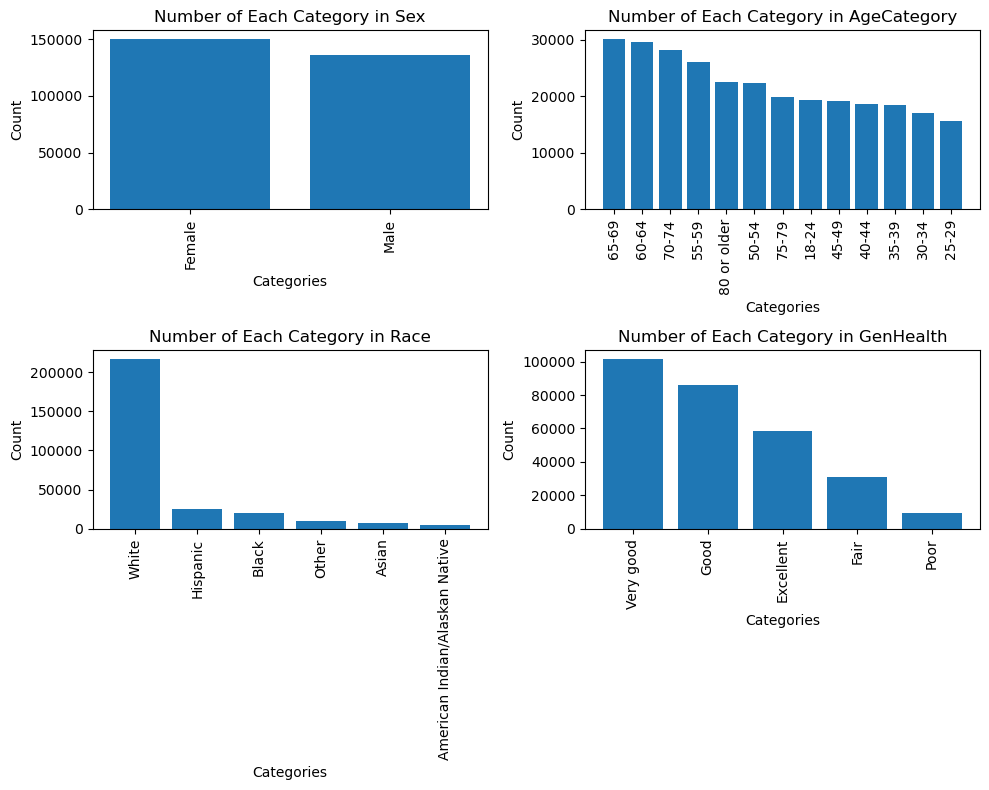

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

num_columns = len(columns_to_display)
num_rows = (num_columns + 1) // 2  # Add 1 to round up if there is an odd number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 8))

# Iterate through columns
for i, column in enumerate(columns_to_display):
    # Calculate the row and column indices for the current subplot
    row = i // 2
    col = i % 2

    # Count frequency of each category
    category_counts = no_duplicates[column].value_counts()

    # Create bar plot for the current column in the appropriate subplot
    axes[row, col].bar(category_counts.index, category_counts.values)

    axes[row, col].set_xlabel('Categories')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Number of Each Category in {column}')
    axes[row, col].set_xticklabels(category_counts.index, rotation=90)

plt.tight_layout()
plt.show()

Looking at the occurrence of each demographic in the dataset, majority of the individuals are either of the White race, aged above 50, and/or have good general health statuses. This might result in the model being biased toward the white race.

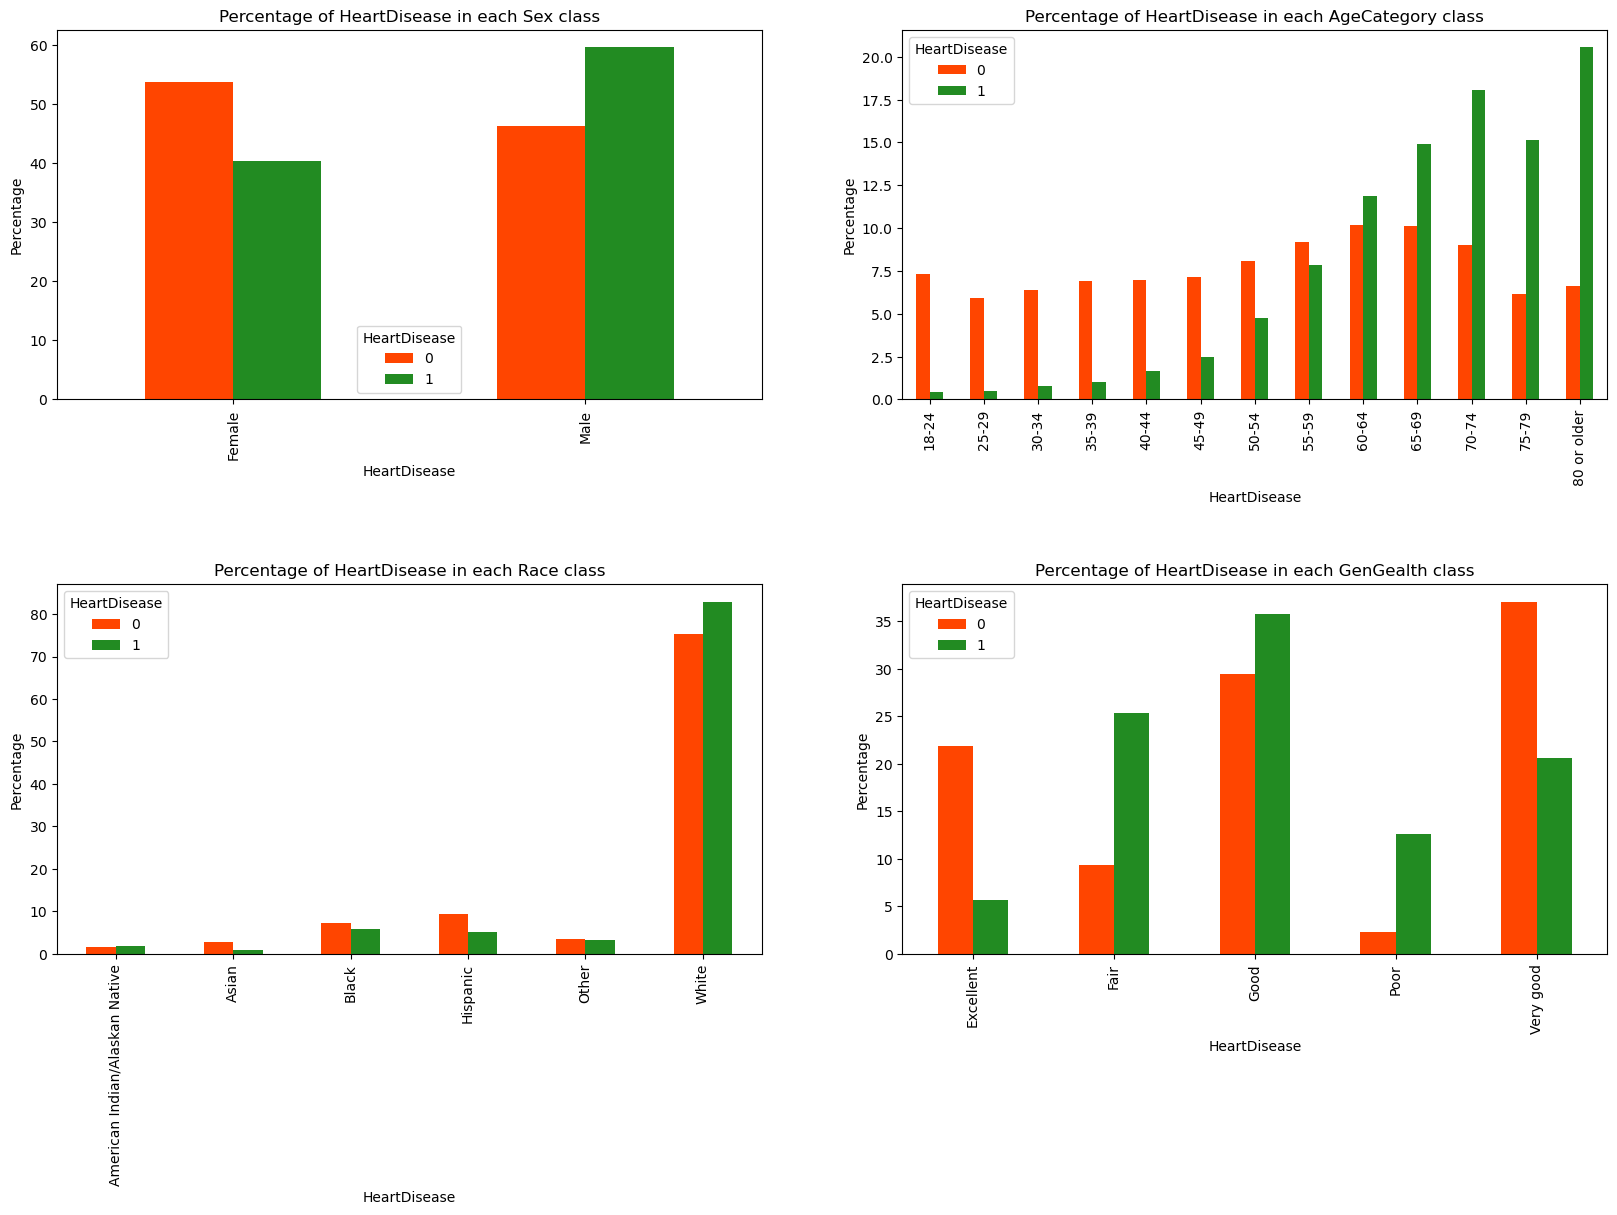

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (20, 12))

no_duplicates.groupby('HeartDisease')['Sex'].value_counts(normalize=True).mul(100).unstack(0).plot(kind='bar', title='Percentage of HeartDisease in each Sex class',
               ylabel='Percentage', xlabel='HeartDisease', color=['orangered', 'forestgreen'], ax=ax[0,0])

no_duplicates.groupby('HeartDisease')['AgeCategory'].value_counts(normalize=True).mul(100).unstack(0).plot(kind='bar', title='Percentage of HeartDisease in each AgeCategory class',
               ylabel='Percentage', xlabel='HeartDisease', color=['orangered', 'forestgreen'], ax=ax[0,1])

no_duplicates.groupby('HeartDisease')['Race'].value_counts(normalize=True).mul(100).unstack(0).plot(kind='bar', title='Percentage of HeartDisease in each Race class',
               ylabel='Percentage', xlabel='HeartDisease', color=['orangered', 'forestgreen'], ax=ax[1,0])

no_duplicates.groupby('HeartDisease')['GenHealth'].value_counts(normalize=True).mul(100).unstack(0).plot(kind='bar', title='Percentage of HeartDisease in each GenGealth class',
               ylabel='Percentage', xlabel='HeartDisease', color=['orangered', 'forestgreen'], ax=ax[1,1])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

Looking at the percentage of heart disease in each class, more individuals with an age above 50 have heart disease as compared to the younger individuals. Although the general health of patients are fair/good/verygood, majority of them still have heart diseases.

## One-Hot Encoding

In [30]:
columns_to_replace = [column for column in categorical_columns if 0 not in list(no_duplicates[column].unique())]

In [31]:
print("One hot encoding will be performed on the follow columns:\n",columns_to_replace)

One hot encoding will be performed on the follow columns:
 ['Sex', 'AgeCategory', 'Race', 'GenHealth']


In [32]:
no_duplicates = pd.get_dummies(data=no_duplicates, columns=columns_to_replace)

In [33]:
no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286216 entries, 0 to 319792
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         286216 non-null  int64  
 1   BMI                                  286216 non-null  float64
 2   Smoking                              286216 non-null  int64  
 3   AlcoholDrinking                      286216 non-null  int64  
 4   Stroke                               286216 non-null  int64  
 5   PhysicalHealth                       286216 non-null  float64
 6   MentalHealth                         286216 non-null  float64
 7   DiffWalking                          286216 non-null  int64  
 8   Diabetic                             286216 non-null  int64  
 9   PhysicalActivity                     286216 non-null  int64  
 10  SleepTime                            286216 non-null  float64
 11  Asthma       

In [34]:
no_duplicates.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


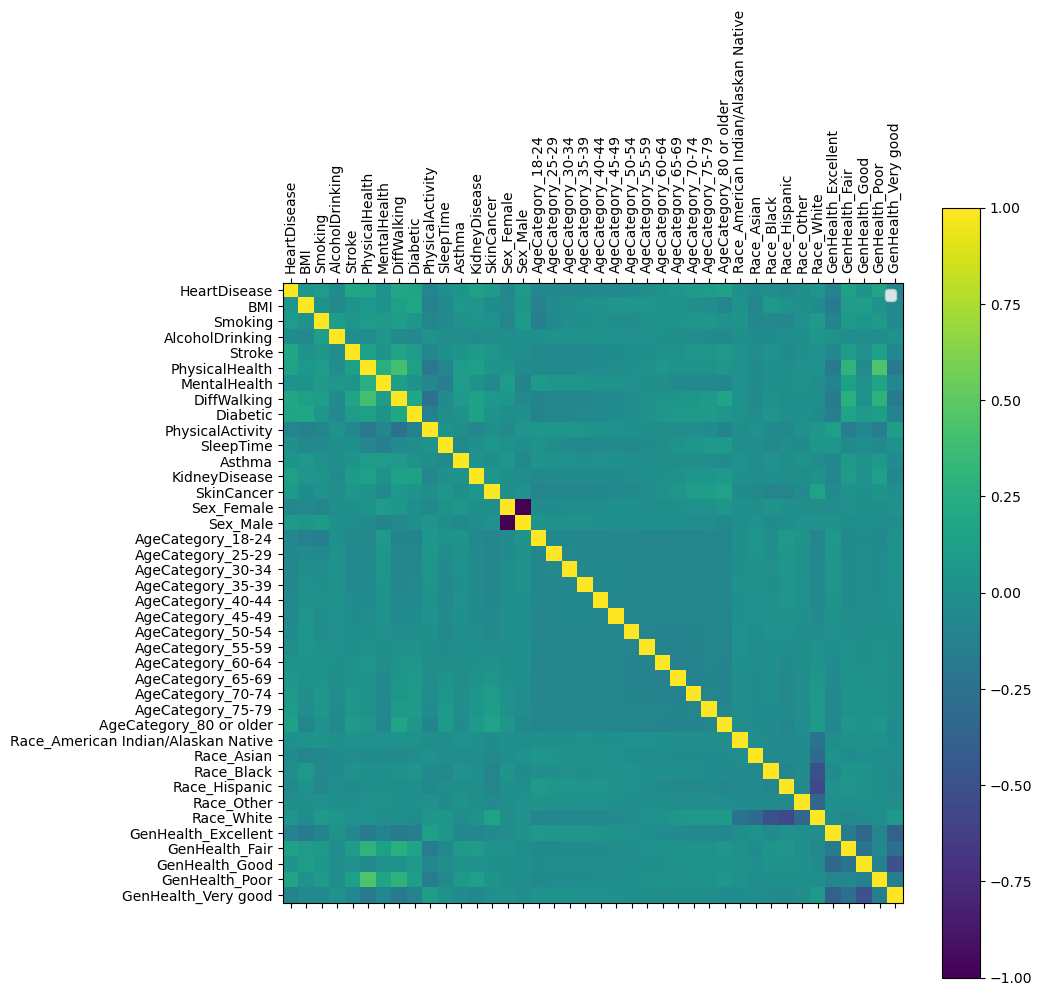

In [35]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(no_duplicates)

## Data Balancing

### Data Balancing with Random Undersampling

I will balance the 1s and 0s to a ratio of 40:60 to ensure the 0s class (does not have heartdisease) remains as the majority class and retains more of its original data, without the model being biased toward the 0s class.

Looking at the distribution of classes in the target column (HeartDisease):
Total records: 286216


,occurrences,occurrences (%)
0,261080,91.22%
1,25136,8.78%


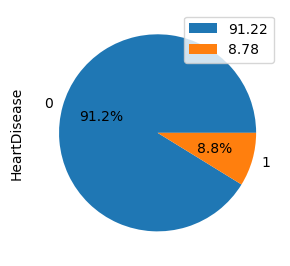

In [36]:
print("Looking at the distribution of classes in the target column (HeartDisease):")

target_column = 'HeartDisease'
dataframe = no_duplicates

# Checking the distribution of the delays
delays = pd.DataFrame({'occurrences': dataframe[target_column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[target_column].value_counts()]})
print("Total records:", sum(delays['occurrences']))
display(delays)

labels = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
(dataframe[target_column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(3, 3), autopct = '%1.1f%%')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [37]:
number_for_sixty = (len(dataframe[dataframe[target_column]==1])/40)*60

df2 = pd.concat([dataframe[dataframe[target_column]==0].sample(n=int(number_for_sixty), random_state=42), dataframe[dataframe[target_column]==1]], axis=0)
df_under = df2.reset_index(drop=True)
# To ensure the same data is sampled and reproduable results, I set a random_state of 42 for the sample function.

Looking at the distribution of classes in the target column (HeartDisease):
Total records: 62840


,occurrences,occurrences (%)
0,37704,60.0%
1,25136,40.0%


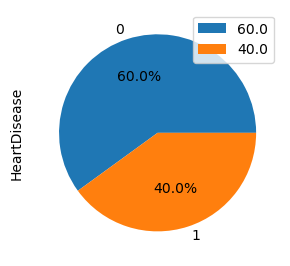

In [38]:
print("Looking at the distribution of classes in the target column (HeartDisease):")

dataframe = df_under

# Checking the distribution of the delays
delays = pd.DataFrame({'occurrences': dataframe[target_column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[target_column].value_counts()]})
print("Total records:", sum(delays['occurrences']))
display(delays)

labels = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
(dataframe[target_column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(3, 3), autopct = '%1.1f%%')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [39]:
dataframe.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,21.95,0,0,0,0.0,30.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,28.13,0,0,0,0.0,0.0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,20.69,1,0,0,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,21.41,0,0,0,0.0,0.0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0,33.99,0,0,0,0.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [40]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62840 entries, 0 to 62839
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HeartDisease                         62840 non-null  int64  
 1   BMI                                  62840 non-null  float64
 2   Smoking                              62840 non-null  int64  
 3   AlcoholDrinking                      62840 non-null  int64  
 4   Stroke                               62840 non-null  int64  
 5   PhysicalHealth                       62840 non-null  float64
 6   MentalHealth                         62840 non-null  float64
 7   DiffWalking                          62840 non-null  int64  
 8   Diabetic                             62840 non-null  int64  
 9   PhysicalActivity                     62840 non-null  int64  
 10  SleepTime                            62840 non-null  float64
 11  Asthma                      